## Step 1 - Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
%matplotlib inline

## Step 2 - Import & Clean Data

In [3]:
path=r'/Users/coley/Desktop/Data Analyst School/Achievement 6'

In [4]:
df = pd.read_csv(os.path.join(path, 'Data', 'Data2.csv'))

In [5]:
df.head()

ID                  Title  Year  Age  IMDb  Rotten Tomatoes  Netflix  \
0    869                 Trophy  2016  NaN   7.3             0.98        1   
1  10663         Punk in Africa  2012  NaN   6.1              NaN        0   
2  10682           Killing Heat  1981  13+   4.8              NaN        0   
3  13614  The One Eyed Soldiers  1966  NaN   4.1              NaN        0   
4   7064    Transylvania 6-5000  1985   7+   5.0             0.18        0   

   Hulu  Prime Video  Disney+  ... United Kingdom United States Uruguay  \
0     0            0        0  ...              1             1       0   
1     0            1        0  ...              0             0       0   
2     0            1        0  ...              0             0       0   
3     0            1        0  ...              1             1       0   
4     0            1        0  ...              0             1       0   

   Vanuatu  Venezuela  Vietnam  Yemen  Yugoslavia  Zambia  Zimbabwe  
0        0          0        0      0           0       0         1  
1        0          0        0      0           0       0         1  
2        0          0        0      0           0       1         0  
3        0          0        0      0           1       0         0  
4        0          0        0      0           1       0         0  

[5 rows x 164 columns]

In [6]:
#remove categorical columns
subset = df[['Year', 'IMDb','Rotten Tomatoes','Runtime']]

In [7]:
subset.head()

Year  IMDb  Rotten Tomatoes  Runtime
0  2016   7.3             0.98    108.0
1  2012   6.1              NaN     82.0
2  1981   4.8              NaN    105.0
3  1966   4.1              NaN     81.0
4  1985   5.0             0.18     93.0

In [8]:
#check for null variables
subset.isnull().sum()

Year                   0
IMDb                 354
Rotten Tomatoes    11170
Runtime              291
dtype: int64

In [9]:
subset.describe()

Year          IMDb  Rotten Tomatoes       Runtime
count  16309.000000  15955.000000      5139.000000  16018.000000
mean    2002.767674      5.896402         0.653773     93.605569
std       20.824430      1.345115         0.266135     28.092108
min     1902.000000      0.000000         0.020000      1.000000
25%     2000.000000      5.100000         0.440000     83.000000
50%     2012.000000      6.100000         0.710000     92.000000
75%     2016.000000      6.900000         0.880000    104.000000
max     2020.000000      9.300000         1.000000   1256.000000

In [10]:
df['IMDb'].fillna(5.8, inplace=True)

In [11]:
df['Rotten Tomatoes'].fillna(0.65, inplace=True)

In [12]:
df['Runtime'].fillna(93.0, inplace=True)

In [13]:
#remove categorical columns
subset = df[['Year', 'IMDb','Rotten Tomatoes','Runtime']]

In [14]:
subset.isnull().sum()

Year               0
IMDb               0
Rotten Tomatoes    0
Runtime            0
dtype: int64

## Step 3 - Elbow Technique

In [15]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [16]:
score = [kmeans[i].fit(subset).score(subset) for i in range(len(kmeans))]

score

[-19741494.805304337,
 -14057859.4290388,
 -9396663.784884771,
 -6969131.553671807,
 -5464281.510011541,
 -4480236.297232416,
 -3541124.108417768,
 -3143069.934286279,
 -2827697.4200619385]

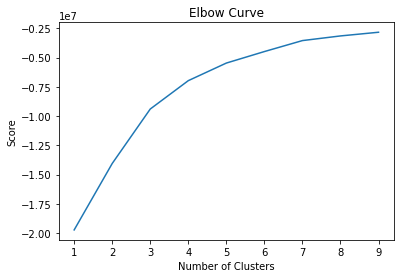

In [17]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## Step 4 - How Many Clusters Needed?

Will need 4 clusters to use in k-means algorithm based on the above Elbow Curve - it is a bit difficult to see but there are bedns at 3 and 4 so 4 wil be the clusters needed.

## Step 5 - Run k-Means Algorithm

In [18]:
kmeans = KMeans(n_clusters = 4, n_jobs = -1)

In [19]:
kmeans.fit(subset)

/Users/coley/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

## Step 6 - Add Clusters Column to Dataframe

In [20]:
df['clusters'] = kmeans.fit_predict(subset)

/Users/coley/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [21]:
df.head()

ID                  Title  Year  Age  IMDb  Rotten Tomatoes  Netflix  \
0    869                 Trophy  2016  NaN   7.3             0.98        1   
1  10663         Punk in Africa  2012  NaN   6.1             0.65        0   
2  10682           Killing Heat  1981  13+   4.8             0.65        0   
3  13614  The One Eyed Soldiers  1966  NaN   4.1             0.65        0   
4   7064    Transylvania 6-5000  1985   7+   5.0             0.18        0   

   Hulu  Prime Video  Disney+  ... United States Uruguay Vanuatu  Venezuela  \
0     0            0        0  ...             1       0       0          0   
1     0            1        0  ...             0       0       0          0   
2     0            1        0  ...             0       0       0          0   
3     0            1        0  ...             1       0       0          0   
4     0            1        0  ...             1       0       0          0   

   Vietnam  Yemen  Yugoslavia  Zambia  Zimbabwe  clusters  
0        0      0           0       0         1         0  
1        0      0           0       0         1         0  
2        0      0           0       1         0         1  
3        0      0           1       0         0         1  
4        0      0           1       0         0         0  

[5 rows x 165 columns]

In [22]:
df['clusters'].value_counts()

0    10130
1     2330
2     2126
3     1723
Name: clusters, dtype: int64

## Step 7 - Create Scatterplots

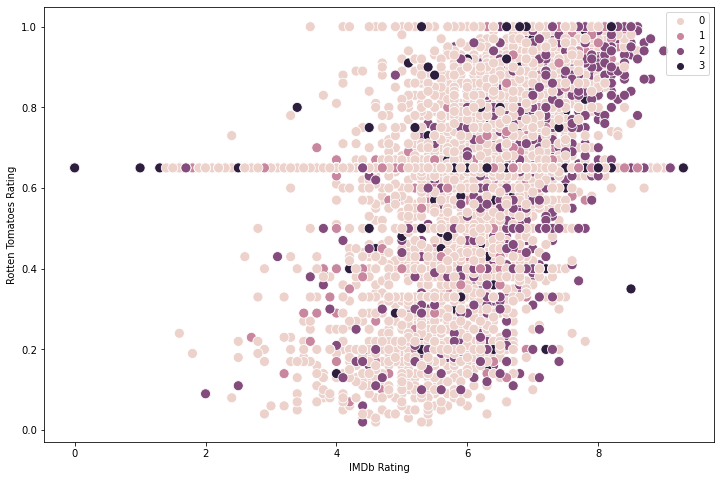

In [23]:
plt.figure(figsize=(12,8))
fig1 = sns.scatterplot(x=df['IMDb'], y=df['Rotten Tomatoes'], hue=kmeans.labels_, s=100) 

fig1.grid(False)
plt.xlabel('IMDb Rating')
plt.ylabel('Rotten Tomatoes Rating')
plt.show()

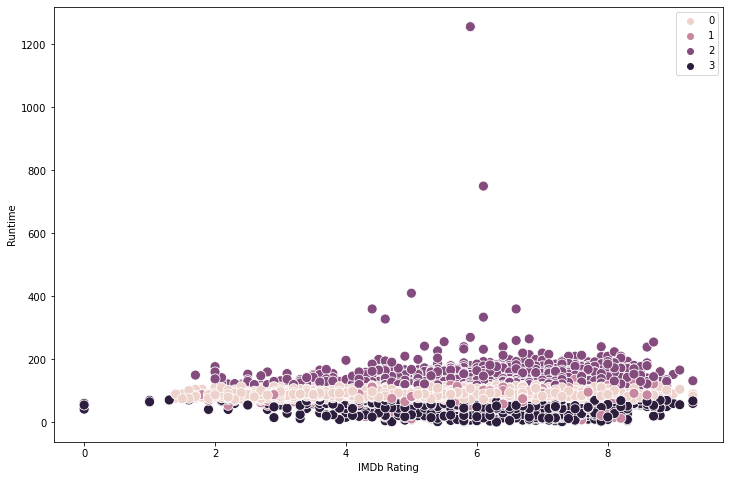

In [24]:
plt.figure(figsize=(12,8))
fig2 = sns.scatterplot(x=df['IMDb'], y=df['Runtime'], hue=kmeans.labels_, s=100) 

fig2.grid(False)
plt.xlabel('IMDb Rating')
plt.ylabel('Runtime')
plt.show()

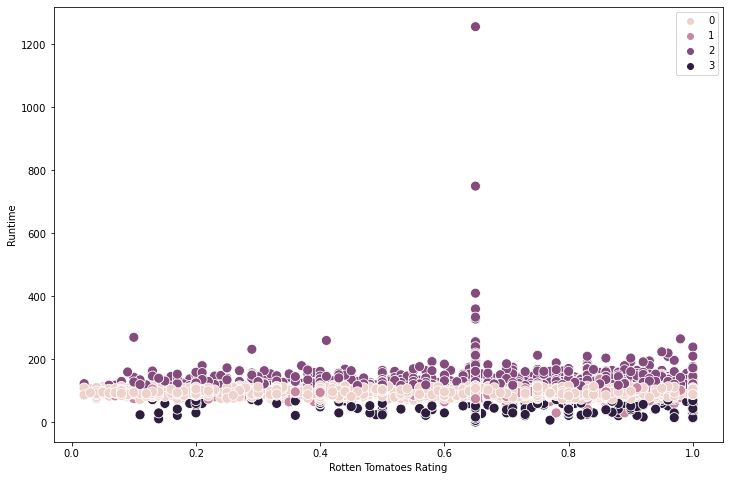

In [25]:
plt.figure(figsize=(12,8))
fig3 = sns.scatterplot(x=df['Rotten Tomatoes'], y=df['Runtime'], hue=kmeans.labels_, s=100) 

fig3.grid(False)
plt.xlabel('Rotten Tomatoes Rating')
plt.ylabel('Runtime')
plt.show()

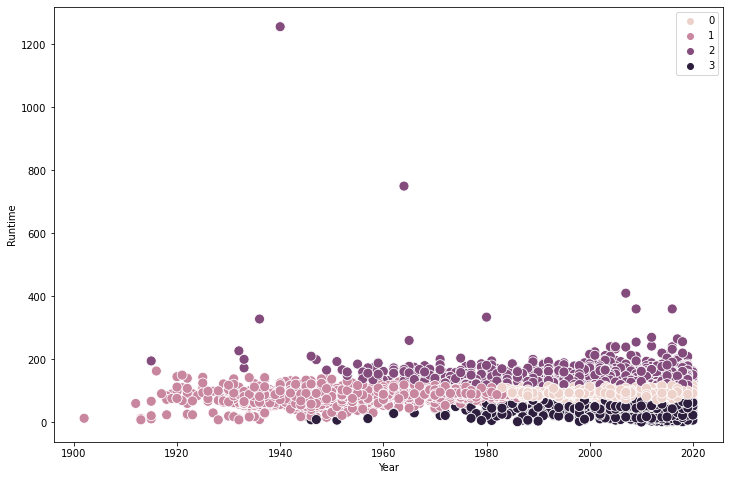

In [26]:
plt.figure(figsize=(12,8))
fig4 = sns.scatterplot(x=df['Year'], y=df['Runtime'], hue=kmeans.labels_, s=100) 

fig4.grid(False)
plt.xlabel('Year')
plt.ylabel('Runtime')
plt.show()

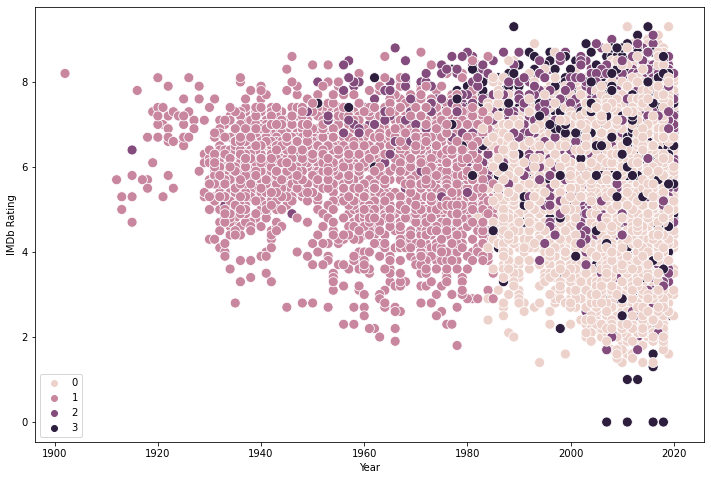

In [27]:
plt.figure(figsize=(12,8))
fig5 = sns.scatterplot(x=df['Year'], y=df['IMDb'], hue=kmeans.labels_, s=100) 

fig5.grid(False)
plt.xlabel('Year')
plt.ylabel('IMDb Rating')
plt.show()

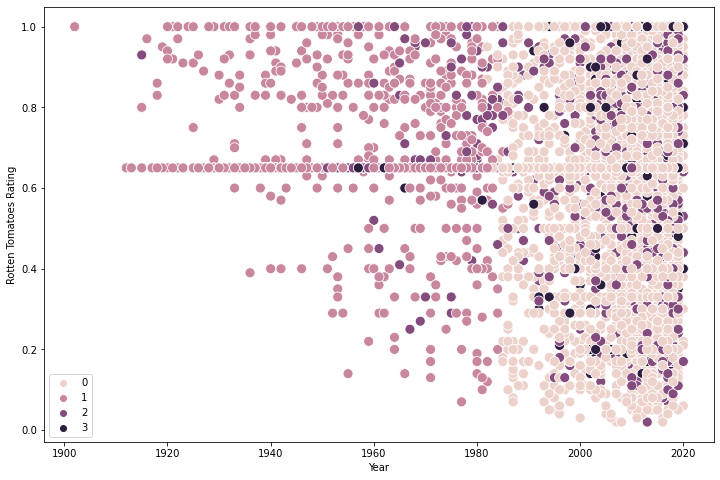

In [28]:
plt.figure(figsize=(12,8))
fig6 = sns.scatterplot(x=df['Year'], y=df['Rotten Tomatoes'], hue=kmeans.labels_, s=100) 

fig6.grid(False)
plt.xlabel('Year')
plt.ylabel('Rotten Tomatoes Rating')
plt.show()

## Step 8 - Notes on Scatterplots

Many of the clusters are intermingled with others - example; For the Rotten Tomatoes Rating vs Year the pink and light pink are fairly seperate from each other but the other two colors are quite mixed with the light pink

As for Runtime vs Year - the clusters are quite seperated and grouped aside for a few outliers

## Step 9 - Calculate Descriptive Statistics Using Groupby

In [29]:
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

In [30]:
df.groupby('cluster').agg({'Year':['mean', 'median'], 
                         'IMDb':['mean', 'median'], 
                         'Rotten Tomatoes':['mean', 'median'],
                          'Runtime':['mean', 'median']})

Year             IMDb        Rotten Tomatoes         \
                    mean median      mean median            mean median   
cluster                                                                   
dark purple  2010.298897   2013  6.336970    6.5        0.659466   0.65   
light pink   2010.700197   2013  5.706426    5.8        0.644435   0.65   
pink         1959.075536   1961  5.854721    5.9        0.666837   0.65   
purple       2006.751646   2012  6.474177    6.6        0.659511   0.65   

                Runtime         
                   mean median  
cluster                         
dark purple   51.258270   57.0  
light pink    93.417473   93.0  
pink          84.722747   87.0  
purple       138.474130  130.0

## Step 10 - Results

For the Year - the mean and median are fairly similar (within 3 years) for each cluster except for purple having a 6 year difference

For IMDb rating - the mean and median are fairly simialr for each cluster (within 0.2)

For Rotten Tomatoes rating - the mean and median almost exactly matched for each cluster (within 0.01)

For Runtime - the mean and median are fairly similar (within 3 minutes) except for the purple cluster having an 8 minute difference and the dark purple cluster having a 6 minute difference